In [77]:
import pandas as pd
data=pd.read_csv("user_data1.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [78]:
X=data.iloc[:,2:-1]
y=data.iloc[:,-1]
print(X)
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X = X.apply(le.fit_transform)
print(X)

     Age  EstimatedSalary
0      1                4
1     17                5
2      8               26
3      9               39
4      1               57
..   ...              ...
395   28               24
396   33                8
397   32                5
398   18               17
399   31               20

[400 rows x 2 columns]


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train)
print("\n")
print(y_train)
print("\n")
print(X_test)
print("\n")
print(y_test)

     Age  EstimatedSalary
336   40              111
64    41               64
55     6               38
106    8               19
300   40               22
..   ...              ...
323   30               14
192   11               26
117   18               35
47     9               37
172    8               92

[320 rows x 2 columns]


336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64


     Age  EstimatedSalary
132   12               68
309   20               33
341   17               56
196   12               60
246   17               33
..   ...              ...
14     0               63
363   24               60
304   22               42
361   35               18
329   29               84

[80 rows x 2 columns]


132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64


In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [82]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.94
Confusion Matrix:
[[54  4]
 [ 1 21]]


In [84]:
# # Sample input data
# new_data = {'outlook': 'sunny', 'temp': 'hot', 'humidity': 'high', 'windy': 'Weak'}

# # Convert to DataFrame
# new_data = pd.DataFrame([new_data])

# # Encode categorical features
# new_data = new_data.apply(le.transform)

# # Standardize the numerical data
# new_data = scaler.transform(new_data)

# # Make prediction
# prediction = model.predict(new_data)

# # Print prediction
# print("Prediction:", prediction[0])

<ipython-input-85-134d43ca0962>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


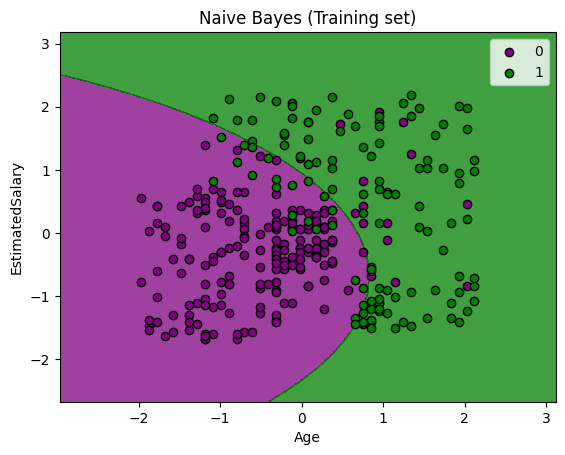

In [85]:
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

# Retrain model on just the first two features if using only 2D plot
X_train_2D = X_train[:, :2]  # select only the first two features for training
X_test_2D = X_test[:, :2]

# Fit model on reduced dataset
model.fit(X_train_2D, y_train)

# Plot decision boundary
X_set, y_set = X_train_2D, y_train
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
)
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j, edgecolors='k')
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()
